In [1]:
#Import lib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

loc = 'C:/Users/tchou/M2_Machine_Learning/Projet_Game_Recommandation/Dataset/'


In [2]:
steam_raw = pd.read_csv(loc + "steam-200k.csv",usecols=[0,1,2,3],names=['userid','game','behavior','hoursplayed'])

In [3]:
steam_raw.head()

,userid,game,behavior,hoursplayed
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [4]:
steam_raw.isnull().values.any()

False

In [5]:
steam_raw['userid'] = steam_raw.userid.astype(str)
steam_raw.describe()

,hoursplayed
count,200000.000000
mean,17.874384
std,138.056952
min,0.100000
25%,1.000000
50%,1.000000
75%,1.300000
max,11754.000000


In [6]:
steam_raw.groupby(['game']).mean().sort_values(by="hoursplayed",ascending=False).head()
steam_raw.groupby(['game']).sum().sort_values(by="hoursplayed",ascending=False).head()

,hoursplayed
game,
Dota 2,986525.6
Counter-Strike Global Offensive,324183.6
Team Fortress 2,175996.3
Counter-Strike,135117.1
Sid Meier's Civilization V,100417.3


In [7]:
len(steam_raw['game'].unique())

5155

In [8]:
len(steam_raw['userid'].unique())

12393

<AxesSubplot:title={'center':'Number of players for Most Popular Games'}, xlabel='Game', ylabel='No. of players'>

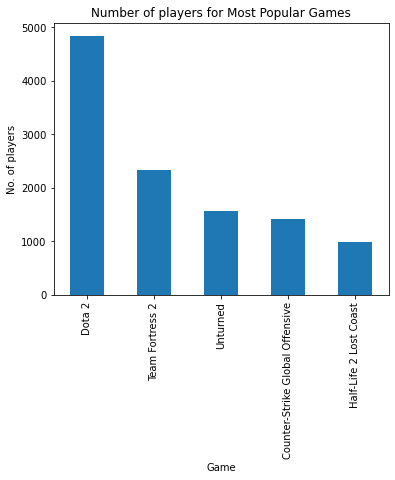

In [9]:
gb = steam_raw.groupby('game')['userid'].nunique().sort_values(ascending=False).head()
ax = gb.plot(kind='bar', title='Number of players for Most Popular Games', ylabel='No. of players',
         xlabel='Game', figsize=(6, 5))

ax

In [10]:
steam_df = steam_raw.copy()
steam_df['like'] = [1 if x > 40 else 0 for x in steam_df['hoursplayed']]
steam_df['like'].value_counts()
steam_df.head()

steam_df["like"] = [ 1 if steam_df['hoursplayed'].iloc[i] >= metrics_df["Avg Hours Played"].loc[metrics_df["game"] == steam_df['game'].iloc[i]].iloc[0] else 0 for i in range(len(steam_df))]

,userid,game,behavior,hoursplayed,like
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,1
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,1
4,151603712,Spore,purchase,1.0,0


In [11]:
bg=steam_df.groupby('game')['like'].apply(lambda x: (x==1).sum()).sort_values(ascending=False)
bg.head()

game
Dota 2                             1417
Counter-Strike Global Offensive     776
Team Fortress 2                     480
The Elder Scrolls V Skyrim          362
Sid Meier's Civilization V          265
Name: like, dtype: int64

In [12]:
gb.head()

game
Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
Name: userid, dtype: int64

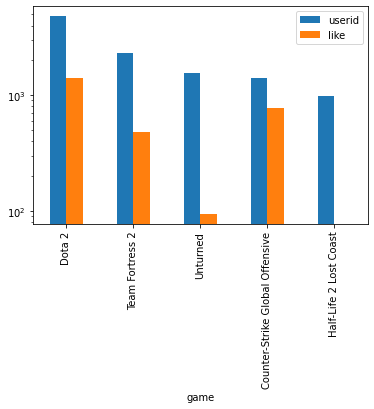

In [13]:
#Plot grouped bar-chart of common games
gbbg = pd.merge(gb, bg, on='game')
gbc = gbbg.plot.bar(logy=True)

In [14]:
x = steam_df.groupby(['userid', 'game'])['behavior'].size()
s = x[x == 1]
print(len(s))
print(len(x))

57904
128804


In [15]:
boolean_index = steam_df.groupby(['userid','game'])['behavior'].transform('size') < 2

In [16]:
steam_df.loc[boolean_index,'hoursplayed'] = 0
steam_df.loc[steam_df['hoursplayed']==0]

,userid,game,behavior,hoursplayed,like
52,151603712,Alan Wake,purchase,0.0,0
53,151603712,BioShock 2,purchase,0.0,0
54,151603712,Fallen Earth,purchase,0.0,0
55,151603712,Fallout New Vegas Courier's Stash,purchase,0.0,0
56,151603712,Fallout New Vegas Dead Money,purchase,0.0,0
...,...,...,...,...,...
199947,99096740,The Elder Scrolls V Skyrim - Hearthfire,purchase,0.0,0
199956,176449171,Counter-Strike,purchase,0.0,0
199957,176449171,Counter-Strike Condition Zero,purchase,0.0,0
199958,176449171,Counter-Strike Condition Zero Deleted Scenes,purchase,0.0,0


In [17]:
steam_df.loc[steam_df.hoursplayed==0,'behavior'] = 'play'
steam_df.loc[steam_df['hoursplayed'] ==0]

,userid,game,behavior,hoursplayed,like
52,151603712,Alan Wake,play,0.0,0
53,151603712,BioShock 2,play,0.0,0
54,151603712,Fallen Earth,play,0.0,0
55,151603712,Fallout New Vegas Courier's Stash,play,0.0,0
56,151603712,Fallout New Vegas Dead Money,play,0.0,0
...,...,...,...,...,...
199947,99096740,The Elder Scrolls V Skyrim - Hearthfire,play,0.0,0
199956,176449171,Counter-Strike,play,0.0,0
199957,176449171,Counter-Strike Condition Zero,play,0.0,0
199958,176449171,Counter-Strike Condition Zero Deleted Scenes,play,0.0,0


In [18]:
steam_df = steam_df[steam_df.behavior != 'purchase']
steam_df

,userid,game,behavior,hoursplayed,like
1,151603712,The Elder Scrolls V Skyrim,play,273.0,1
3,151603712,Fallout 4,play,87.0,1
5,151603712,Spore,play,14.9,0
7,151603712,Fallout New Vegas,play,12.1,0
9,151603712,Left 4 Dead 2,play,8.9,0
...,...,...,...,...,...
199991,128470551,Fallen Earth,play,2.4,0
199993,128470551,Magic Duels,play,2.2,0
199995,128470551,Titan Souls,play,1.5,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0


In [19]:
# Create a new dataframe to store metrics
d = {'like':'Sum Likes','hoursplayed':'Avg Hours Played'}
metrics_df = steam_df.groupby(['game'], as_index=False).agg({'like':'sum','hoursplayed':'mean'}).rename(columns=d)
metrics_df.loc[metrics_df['game'] == "Dota 2"] #Check Dota 2

,game,Sum Likes,Avg Hours Played
1336,Dota 2,1417,202.785499


In [20]:
# Calculate mean of Hours Played average
c = metrics_df['Avg Hours Played'].mean()
print("Average hours played across all games is " + str(round(c,2)))

Average hours played across all games is 6.78


In [21]:
# Calculate the minimum number of likes required, set to 95 percentile
m = metrics_df['Sum Likes'].quantile(0.95)
print("Minimum number of likes for a game is " + str(m))

Minimum number of likes for a game is 5.0


In [22]:
print(metrics_df.shape)
metrics_df = metrics_df.loc[metrics_df['Sum Likes'] >= m]
print(metrics_df.shape)
metrics_df.head()

(5155, 3)
(266, 3)


,game,Sum Likes,Avg Hours Played
38,7 Days to Die,22,39.567961
81,APB Reloaded,17,35.256489
84,ARK Survival Evolved,61,83.393252
109,AdVenture Capitalist,33,27.331982
174,Age of Empires II HD Edition,33,28.817227


In [23]:
def weighted_rating(df, m=m, C=c):
    l = df['Sum Likes']
    a = df['Avg Hours Played']
    return (l/(l+m) * a) + (m/(l+m) * C)

metrics_df['score'] = metrics_df.apply(weighted_rating, axis=1)
metrics_df.head()

,game,Sum Likes,Avg Hours Played,score
38,7 Days to Die,22,39.567961,33.495568
81,APB Reloaded,17,35.256489,28.783886
84,ARK Survival Evolved,61,83.393252,77.588993
109,AdVenture Capitalist,33,27.331982,24.627384
174,Age of Empires II HD Edition,33,28.817227,25.917202


In [24]:
metrics_df.head()

,game,Sum Likes,Avg Hours Played,score
38,7 Days to Die,22,39.567961,33.495568
81,APB Reloaded,17,35.256489,28.783886
84,ARK Survival Evolved,61,83.393252,77.588993
109,AdVenture Capitalist,33,27.331982,24.627384
174,Age of Empires II HD Edition,33,28.817227,25.917202


IndexError: single positional indexer is out-of-bounds

266

5155